In [1]:
from keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt


In [3]:
enc_dim = 32
inp = layers.Input(shape=(784,))


In [4]:
enc = layers.Dense(enc_dim, activation='relu')(inp)
dec = layers.Dense(784, activation='sigmoid')(enc)


In [5]:
auto = models.Model(inp, dec)


In [6]:
enc_m = models.Model(inp, enc)


In [7]:
encoded_input = layers.Input(shape=(enc_dim,))
decoder_layer = auto.layers[-1]          # last layer of auto is the decoder Dense
dec_m = models.Model(encoded_input, decoder_layer(encoded_input))


In [8]:
auto.compile(optimizer='adam', loss='binary_crossentropy')


In [9]:
(xtr, _), (xte, _) = datasets.mnist.load_data()
xtr = xtr.astype('float32') / 255.
xte = xte.astype('float32') / 255.
xtr = xtr.reshape((len(xtr), -1))
xte = xte.reshape((len(xte), -1))


In [10]:
auto.fit(xtr, xtr, epochs=50, batch_size=256, shuffle=True, validation_data=(xte, xte))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2760 - val_loss: 0.1879
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1708 - val_loss: 0.1540
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1442 - val_loss: 0.1329
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1276 - val_loss: 0.1204
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1175 - val_loss: 0.1125
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1109 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1062 - val_loss: 0.1031
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1026 - val_loss: 0.0999
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0998 - val_loss: 0.0975
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0977 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0962 - val_loss: 0.0944
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/st

In [11]:
enc_imgs = enc_m.predict(xte)
dec_imgs = dec_m.predict(enc_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


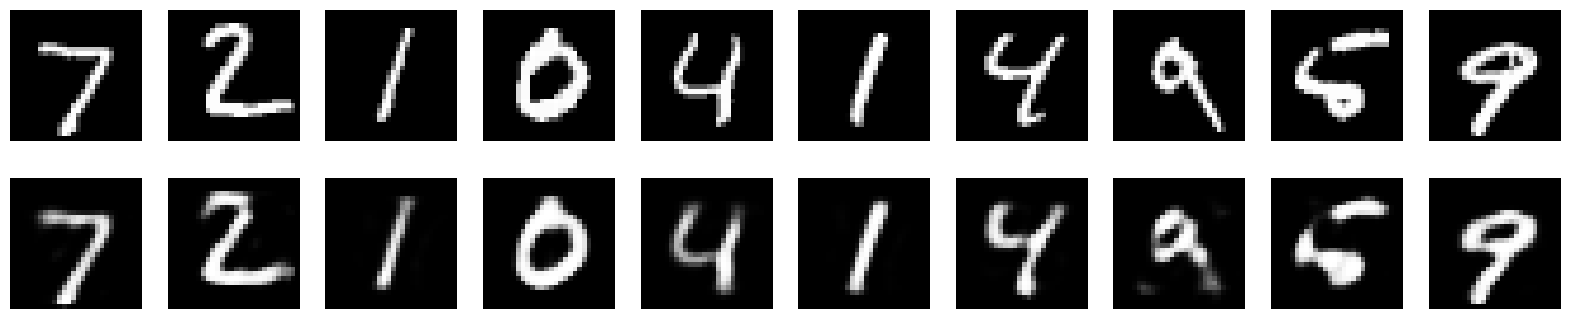

In [12]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xte[i].reshape(28,28)); plt.gray(); ax.axis('off')
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(dec_imgs[i].reshape(28,28)); plt.gray(); ax.axis('off')
plt.show()
